In [1]:
import pandas as pd
import pylab as pl
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploring Business licenses 

In [2]:
licenses = pd.read_csv("License_Applications.csv")

In [3]:
licenses.shape

(224163, 25)

In [4]:
licenses.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN
1,33312-2016-RELE,2010590-DCA,Business,Renewal,T-MOBILE NORTHEAST LLC,Issued,12/28/2016,01/07/2017,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11201,8009279801,-73.987746,40.691630,NaN
2,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN
3,1223-2017-RHIS,1217547-DCA,Individual,Renewal,JUSTINIANO SALDIVAR,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,GLEN OAKS,NY,11004,7189748124,NaN,NaN,NaN
4,20143-2017-ALAU,2064612-DCA,Business,Application,"LEUNG, WAI M",Issued,12/26/2017,01/09/2018,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11223,6464672890,-73.960942,40.594763,NaN


In [5]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [6]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("census_tracts.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
ct = gp.GeoDataFrame.from_file("geo_export_04e27bfe-654f-460f-beae-1bb88eaacb66.shp")

In [8]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

In [9]:
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


## Quick visualization of where the Businesses licenses aplications are located 

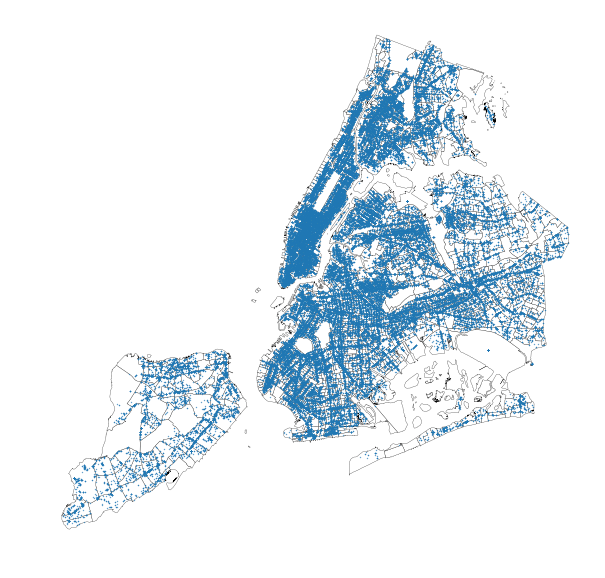

In [10]:

cp.choroplethNYC(ct, column=None, color="white", edgecolor="black", lw=0.25);

pl.scatter(licenses.Longitude, licenses.Latitude, s=0.1)


# We groupby zip code so we have the count of the busniness licenses by zip  

In [11]:
countzip = licenses.groupby(licenses["Zip"]).count()

In [12]:
countzip.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Street 2,Unit Type,Unit,Description,City,State,Contact Phone,Longitude,Latitude,Active Vehicles
Zip,,,,,,,,,,,,,,,,,,,,,
00,1,1,1,1,1,1,1,1,0,0,...,0,0,0,1,1,1,1,0,0,0
000,11,11,11,11,11,11,11,11,0,0,...,0,0,0,6,11,11,11,4,4,0
00000,10,8,10,10,10,10,10,9,0,0,...,0,0,2,2,10,10,8,3,3,0
00623,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
00637,2,2,2,2,2,2,2,2,0,0,...,0,0,0,0,2,2,2,0,0,0


In [13]:
countzip["Zip"] = countzip.index
countzip["Zips"] = countzip.Zip

In [14]:
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

# Transform into geodataframe

In [15]:
zips_ = gp.GeoDataFrame(zips)

In [16]:
licenses.head(1)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN


In [17]:
zips.head(1)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,1905,1813,1905,1905,1905,1905,1905,1852,12,13,...,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."


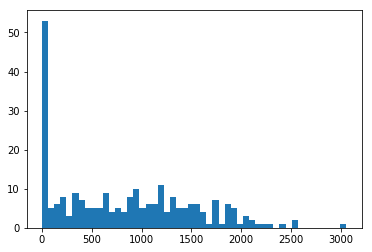

In [18]:
pl.hist(zips["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [19]:
zips1 = zips[zips["License Type"]>0]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

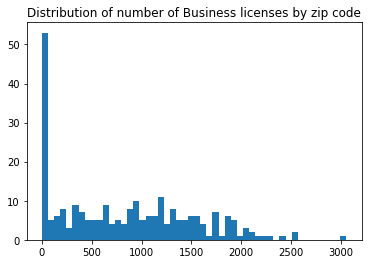

In [103]:
pl.hist(zips1["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [20]:
type(zips.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [21]:
type(zips_.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [22]:
zips_.head(1)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,1905,1813,1905,1905,1905,1905,1905,1852,12,13,...,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."


# Number of total licenses by zip code

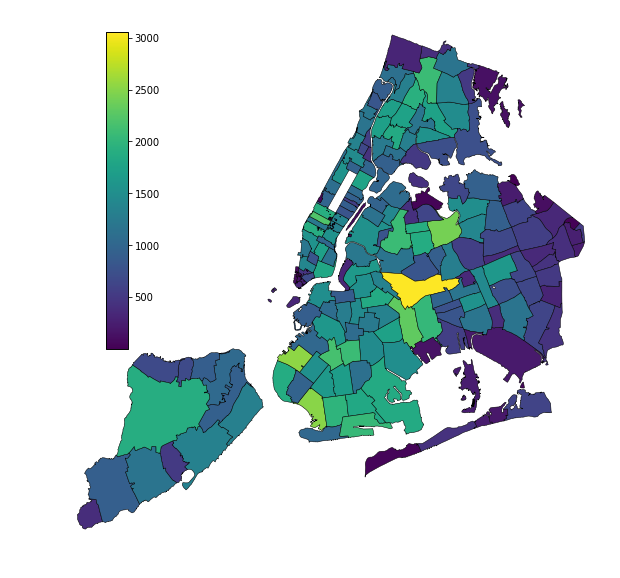

In [23]:


cp.choroplethNYC(zips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);



# Here the general overview is over, we need to start looking for specific types of licenses to see if we get something better.

In [24]:
licenses.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN
1,33312-2016-RELE,2010590-DCA,Business,Renewal,T-MOBILE NORTHEAST LLC,Issued,12/28/2016,01/07/2017,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11201,8009279801,-73.987746,40.691630,NaN
2,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN
3,1223-2017-RHIS,1217547-DCA,Individual,Renewal,JUSTINIANO SALDIVAR,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,GLEN OAKS,NY,11004,7189748124,NaN,NaN,NaN
4,20143-2017-ALAU,2064612-DCA,Business,Application,"LEUNG, WAI M",Issued,12/26/2017,01/09/2018,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11223,6464672890,-73.960942,40.594763,NaN


In [25]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [26]:
licenses["Application or Renewal"].unique()

array(['Renewal', 'Application'], dtype=object)

In [27]:
print("Start date max and min:")
print (licenses["Start Date"].min())
print (licenses["Start Date"].max())





Start date max and min:
01/01/2015
12/31/2017


# Exploring New Licenses

In [28]:
newlicenses = licenses[licenses["Application or Renewal"]== "Application"]

In [29]:
ncountzip = newlicenses.groupby(licenses["Zip"]).count()
ncountzip["Zip"] = ncountzip.index

nzips = pd.merge(ncountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

nzips_ = gp.GeoDataFrame(nzips)

# Number of new licenses by zip code

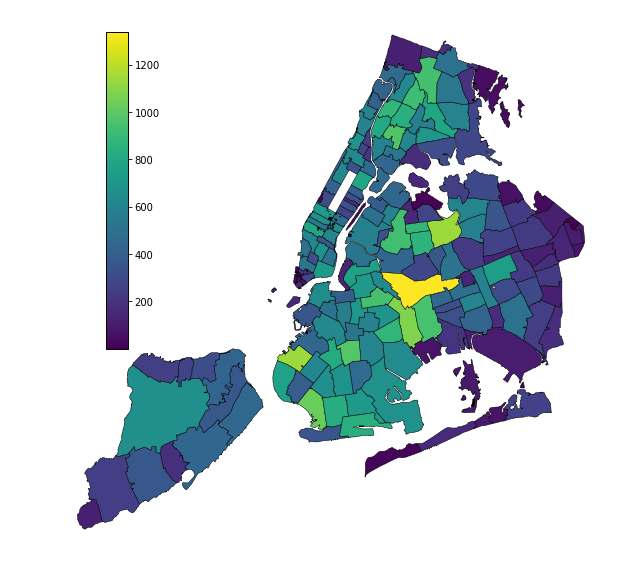

In [30]:
cp.choroplethNYC(nzips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring Renewals

In [31]:
oldlicenses = licenses[licenses["Application or Renewal"]== "Renewal"]

In [32]:
ocountzip = oldlicenses.groupby(licenses["Zip"]).count()
ocountzip["Zip"] = ocountzip.index

ozips = pd.merge(ocountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

ozips_ = gp.GeoDataFrame(ozips)

In [33]:
type(ocountzip.Zip.iloc[1])

str

# Number of renewal licenses by zip code

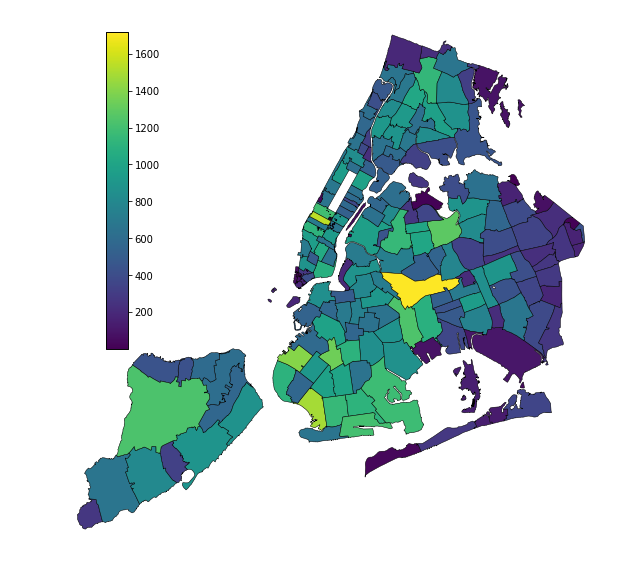

In [34]:
cp.choroplethNYC(ozips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Devide new / old

In [35]:
ozips["count_old"] = ozips["License Type"]
nzips["count_new"] = nzips["License Type"]
nzips["geometry"].drop

<bound method NDFrame.drop of 0      POLYGON ((981958.6472873986 213464.4530421346,...
1      POLYGON ((991339.8703228086 207576.7837151289,...
2      POLYGON ((989830.469142139 207048.1263078749, ...
3      POLYGON ((981197.408652395 196571.0816452205, ...
4      POLYGON ((972696.8446168154 193014.5477478057,...
5      POLYGON ((977542.4500830621 188447.2783390433,...
6      POLYGON ((971218.3702115566 190710.8587856293,...
7      POLYGON ((982595.6794779003 195880.7536295503,...
8      POLYGON ((981136.3431577235 198082.3837407082,...
9      POLYGON ((980538.9073447287 200658.5114624649,...
10     POLYGON ((991606.4032543153 205494.1464762092,...
11     POLYGON ((987500.0003778934 210146.4376965463,...
12     POLYGON ((986378.4337233901 210178.5990495533,...
13     POLYGON ((985200.0558308065 205072.0203519613,...
14     POLYGON ((983216.1014653891 203868.9381124675,...
15     POLYGON ((983985.4854253083 205856.7261316329,...
16     POLYGON ((989286.3432618976 213322.780097127, ...
1

In [36]:
df = pd.merge(ozips,nzips,on="Zip")

In [37]:
df.head(1)

,Application ID_x,License Number_x,License Type_x,Application or Renewal_x,Business Name_x,Status_x,Start Date_x,End Date_x,Temp Op Letter Issued_x,Temp Op Letter Expiration_x,...,AREA_y,STATE_y,COUNTY_y,ST_FIPS_y,CTY_FIPS_y,URL_y,SHAPE_AREA_y,SHAPE_LEN_y,geometry_y,count_new
0,1113,1113,1113.0,1113,1113,1113,1113,1106,7,8,...,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,...",792.0


In [38]:
df["n/o"] = df["count_new"]/df["count_old"]

df_ = gp.GeoDataFrame(df)

In [39]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [40]:
df_["geometry"] = df_["geometry_x"]

# Number of new licenses / renewal licenses. 

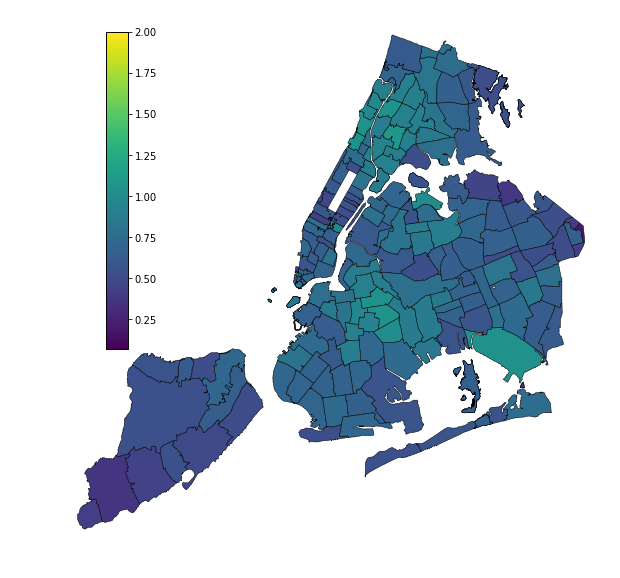

In [41]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([   8.,   16.,   81.,  114.,   48.,   10.,    1.,    1.,    1.,    2.]),
 array([ 0.07142857,  0.26428571,  0.45714286,  0.65      ,  0.84285714,
         1.03571429,  1.22857143,  1.42142857,  1.61428571,  1.80714286,  2.        ]),
 <a list of 10 Patch objects>)

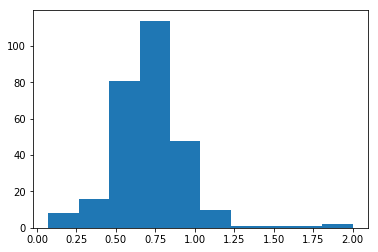

In [42]:
pl.hist(df_["n/o"])

In [43]:
df_ = df_[df_["n/o"]<1.6]

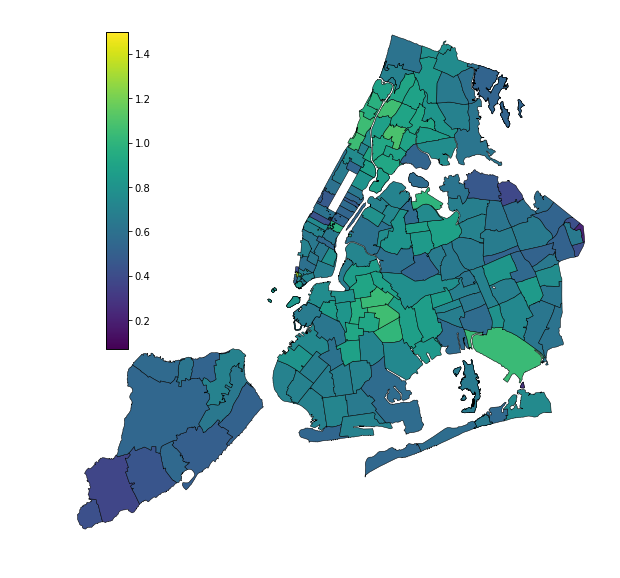

In [44]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [104]:
greaterthan1 = df_[df_["n/o"]>1]
smallerthan1 = df_[df_["n/o"]<1]

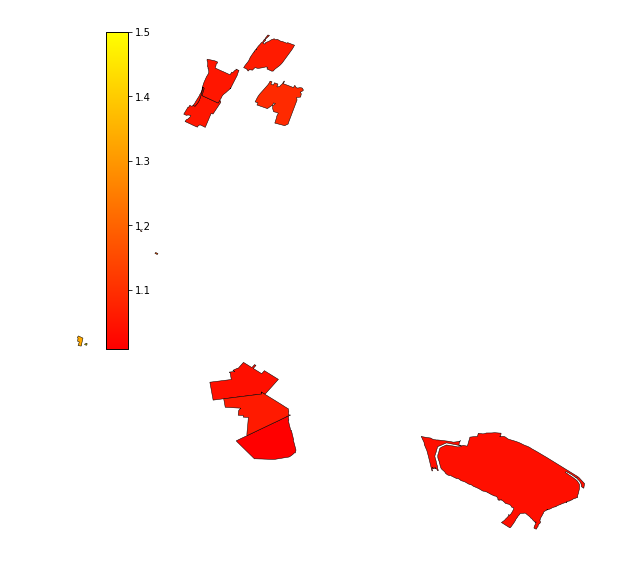

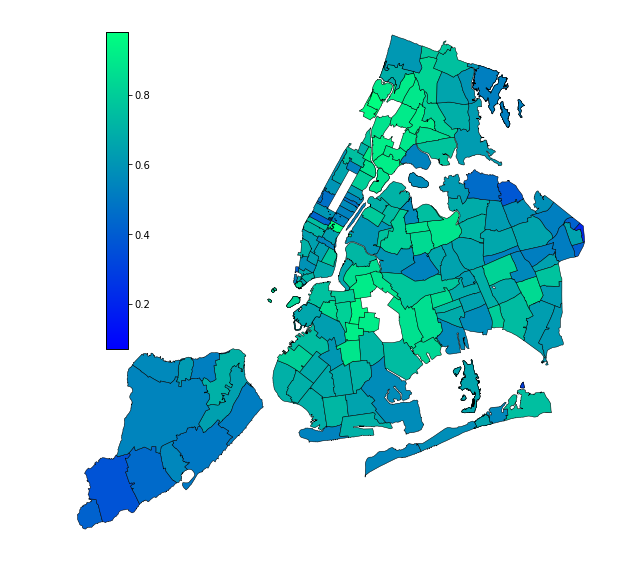

In [110]:
cp.choroplethNYC(greaterthan1, column="n/o", color="k",cmap="autumn", edgecolor="k", lw=0.5)
cp.choroplethNYC(smallerthan1, column="n/o", color="k",cmap="winter", edgecolor="k", lw=0.5);

In [45]:
zips_.head(1)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,1905,1813,1905.0,1905,1905,1905,1905,1852,12,13,...,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."


In [49]:
zips_["density"] = zips_["License Type"]/zips_["AREA"]
zips_["per_capita"] = zips_["License Type"]/zips_["POPULATION"]

In [67]:
zips0_ = zips_[zips_["per_capita"]<0.4]

(array([ 188.,    4.,    2.,    1.,    0.,    1.,    0.,    0.,    0.,    1.]),
 array([  8.02813049e-07,   1.29073879e-04,   2.57344945e-04,
          3.85616012e-04,   5.13887078e-04,   6.42158144e-04,
          7.70429210e-04,   8.98700276e-04,   1.02697134e-03,
          1.15524241e-03,   1.28351347e-03]),
 <a list of 10 Patch objects>)

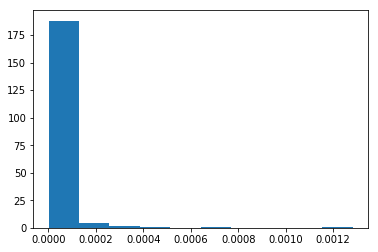

In [61]:
pl.hist(zips0_.density)

In [62]:
zips2_ = zips_[zips_["density"]<0.0004]

# Exploring number of business licenses contoled by area and population. First by area

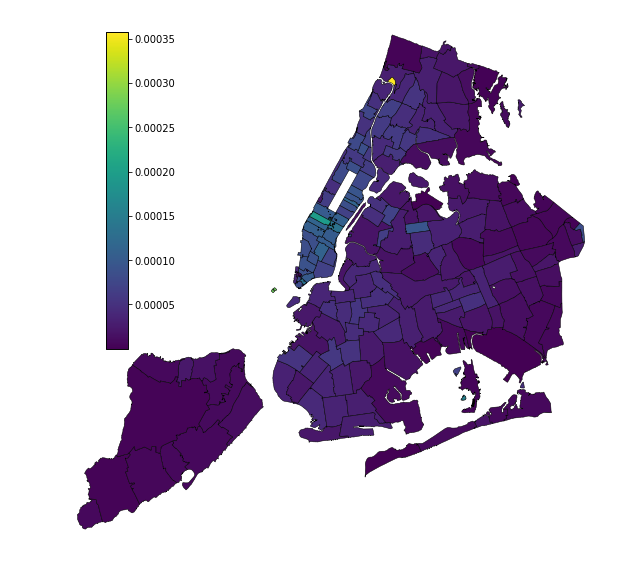

In [64]:
cp.choroplethNYC(zips2_, column="density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Now population

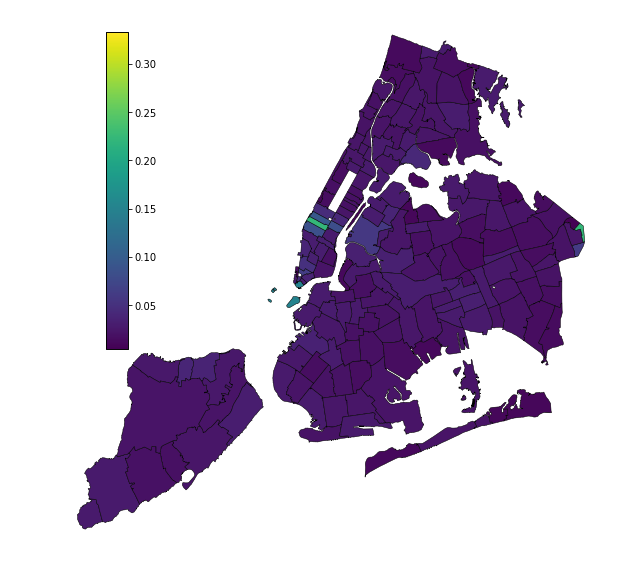

In [68]:
cp.choroplethNYC(zips0_, column="per_capita", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [69]:
zips_.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles', 'Zip',
       'Zips', 'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'density', 'per_capita'],
      dtype='object')

In [71]:
zips_["zip_density"] = zips_["POPULATION"] / zips_["AREA"]

In [93]:
zips3_ = zips_[zips_["zip_density"]<0.02]

In [ ]:
cp.choroplethNYC(zips_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Descriptive population, density and area by CT

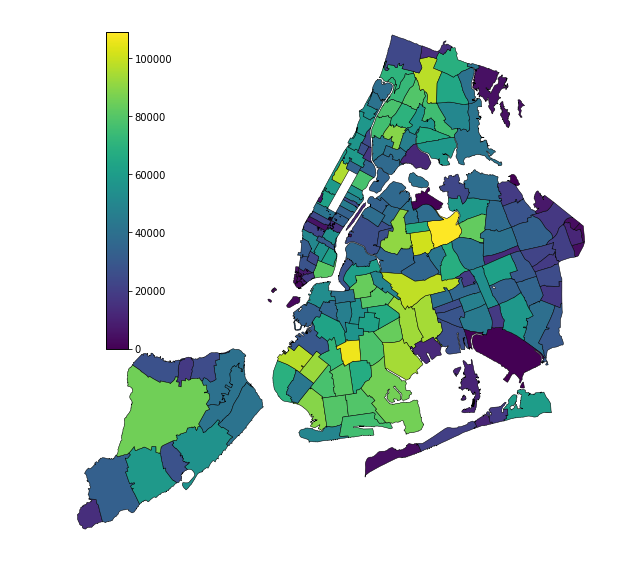

In [95]:
cp.choroplethNYC(zips_, column="POPULATION", color="k",cmap="viridis", edgecolor="k", lw=0.5);

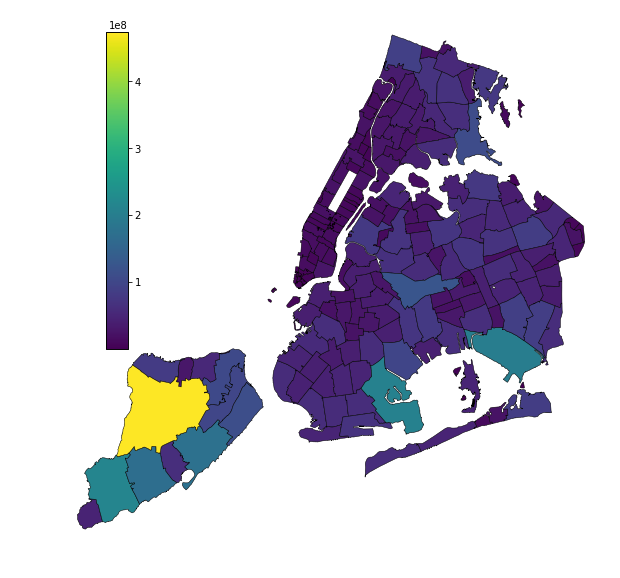

In [96]:
cp.choroplethNYC(zips_, column="AREA", color="k",cmap="viridis", edgecolor="k", lw=0.5);

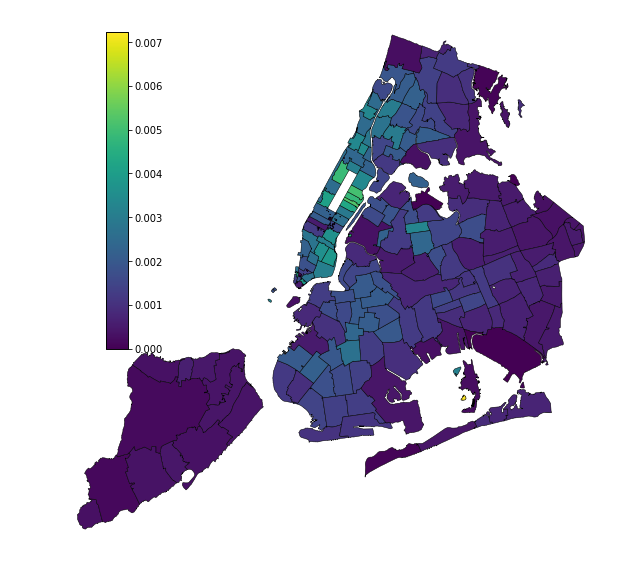

In [106]:
cp.choroplethNYC(zips3_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring building licenses

In [97]:
licenses = pd.read_csv("DOB_Permit_Issuance.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,10,15,31,33,34,35,36,39,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

In [99]:
countzip = licenses.groupby(licenses["Zip Code"]).count()

In [111]:
countzip["Zip"] = countzip.index.astype(int)
countzip["Zips"] = countzip["Zip"].astype(str)
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
zips_ = gp.GeoDataFrame(zips)

In [120]:
print (licenses["Residential"].unique())
print (licenses["Job Type"].unique())
print (licenses["Bldg Type"].unique())

[nan 'YES']
['A2' 'A1' 'A3' 'NB' 'DM' 'SG']
[  2.   1.  nan]


In [132]:
Residential_licenses = licenses[licenses["Residential"]=="YES"]
Non_Residential_licenses = licenses[licenses["Residential"]!="YES"]

big_bldg = licenses[licenses["Bldg Type"]==2]
small_bldg = licenses[licenses["Bldg Type"]==1]

In [138]:
new_buildings = licenses[licenses["Job Type"]=="NB"]
major_renovation = licenses[licenses["Job Type"]=="A1"]

In [112]:
countzip.head(5)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME,Zip,Zips
Zip Code,,,,,,,,,,,,,,,,,,,,,
0.0,51,51,51,51,51,51,51,48,51,51,...,51,51,51,51,51,51,51,51,0,0
4452.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,0,0,0,0,0,4452,4452
10000.0,169,169,169,169,169,169,169,67,169,169,...,164,169,169,169,169,169,169,169,10000,10000
10001.0,52588,52588,52588,52588,52588,52588,52588,33613,52585,52585,...,51870,52588,52588,52568,52568,52568,52568,52568,10001,10001
10002.0,33929,33929,33929,33929,33929,33929,33929,22268,33929,33929,...,33437,33929,33929,33887,33887,33887,33887,33887,10002,10002


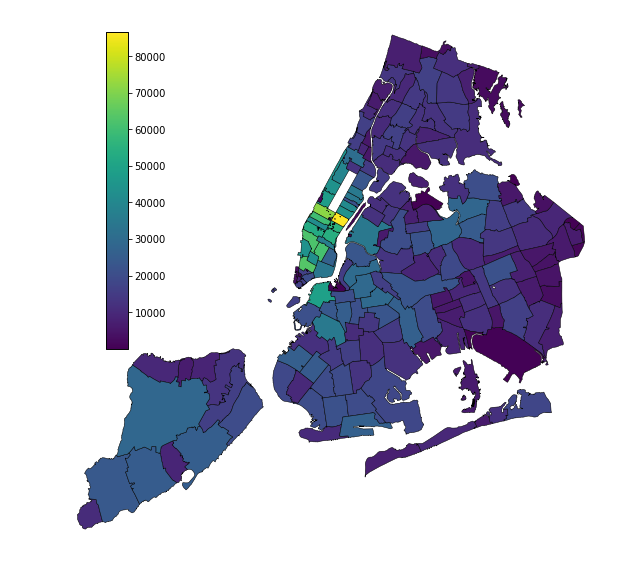

In [113]:
cp.choroplethNYC(zips_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring just residential Licenses

In [116]:
countres = Residential_licenses.groupby(Residential_licenses["Zip Code"]).count()

In [117]:
countres["Zip"] = countres.index.astype(int)
countres["Zips"] = countres["Zip"].astype(str)
res = pd.merge(countres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
res_ = gp.GeoDataFrame(res)

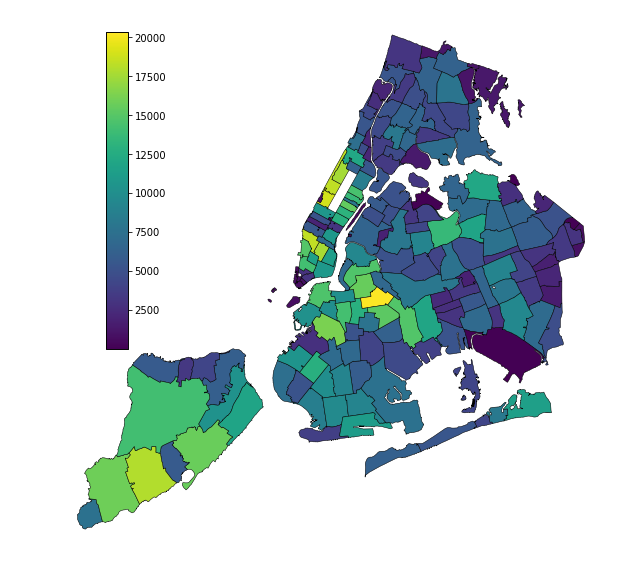

In [119]:
cp.choroplethNYC(res__, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Non residential Bldgs

In [133]:
countnonres = Non_Residential_licenses.groupby(Non_Residential_licenses["Zip Code"]).count()

In [134]:
countnonres["Zip"] = countnonres.index.astype(int)
countnonres["Zips"] = countnonres["Zip"].astype(str)
nonres = pd.merge(countnonres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nonres_ = gp.GeoDataFrame(nonres)

In [135]:
Non_Residential_licenses.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BROOKLYN,3326733,1070,EAST 104 STREET,301064023,1,A2,Y,8230,1,...,NY,11101,7184728000,11/03/2017 12:00:00 AM,1238812,40.644203,-73.892264,46.0,986.0,Canarsie
3,MANHATTAN,1036459,570,LEXINGTON AVENUE,101464835,1,A2,NaN,1305,60,...,NY,10022,2125571100,11/03/2017 12:00:00 AM,679627,40.756925,-73.972066,4.0,100.0,Turtle Bay-East Midtown
4,MANHATTAN,1015847,25,W. 32 ST.,122488478,1,A2,Y,834,26,...,NY,11354,9178283018,11/03/2017 12:00:00 AM,3044504,40.747535,-73.986372,4.0,76.0,Midtown-Midtown South
5,MANHATTAN,1000005,1,NEW YORK PLAZA,110080689,2,A2,Y,4,7501,...,NY,10004,2124830771,11/03/2017 12:00:00 AM,1772250,40.702540,-74.012562,1.0,9.0,Battery Park City-Lower Manhattan
6,BROOKLYN,3000259,350,JAY STREET,300673876,2,A2,NaN,140,27,...,NY,11375,7182633800,11/03/2017 12:00:00 AM,375872,40.693524,-73.987249,33.0,11.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill


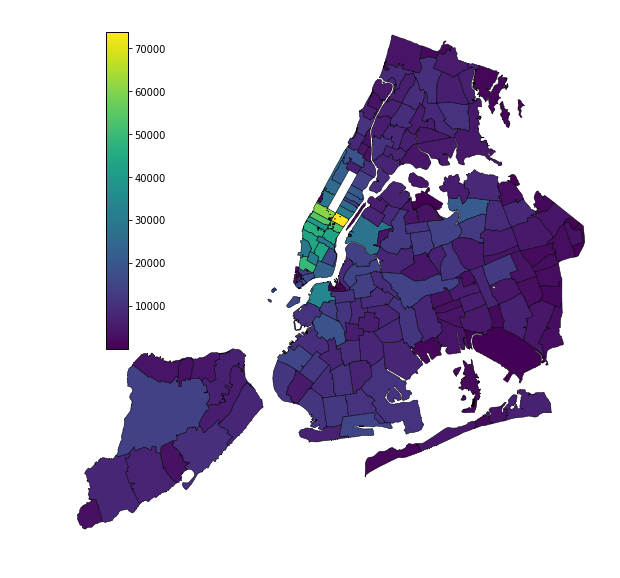

In [136]:
cp.choroplethNYC(nonres_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# New Buildings and Major renoventions

In [141]:
new_buildings_byct = new_buildings.groupby(new_buildings["Zip Code"]).count()
major_renovation_byct = major_renovation.groupby(major_renovation["Zip Code"]).count()

In [145]:
new_buildings_byct["Zip"] = new_buildings_byct.index.astype(int)
new_buildings_byct["Zips"] = new_buildings_byct["Zip"].astype(str)
nb = pd.merge(new_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nb_ = gp.GeoDataFrame(nb)

major_renovation_byct["Zip"] = major_renovation_byct.index.astype(int)
major_renovation_byct["Zips"] = major_renovation_byct["Zip"].astype(str)
mr = pd.merge(major_renovation_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
mr_ = gp.GeoDataFrame(mr)

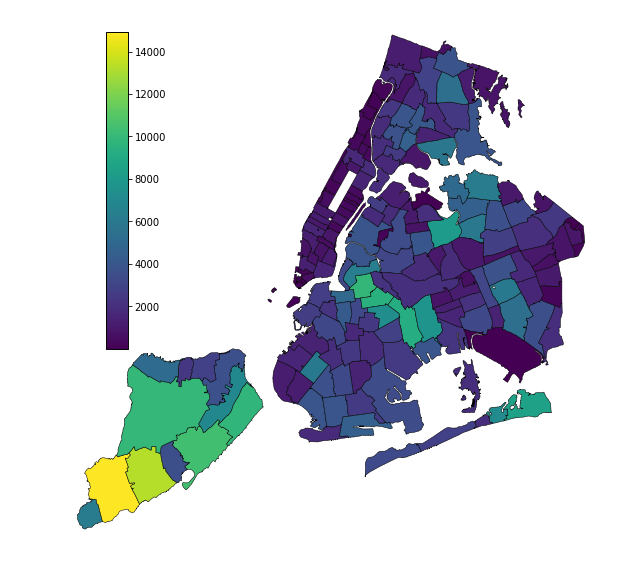

In [146]:
cp.choroplethNYC(nb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

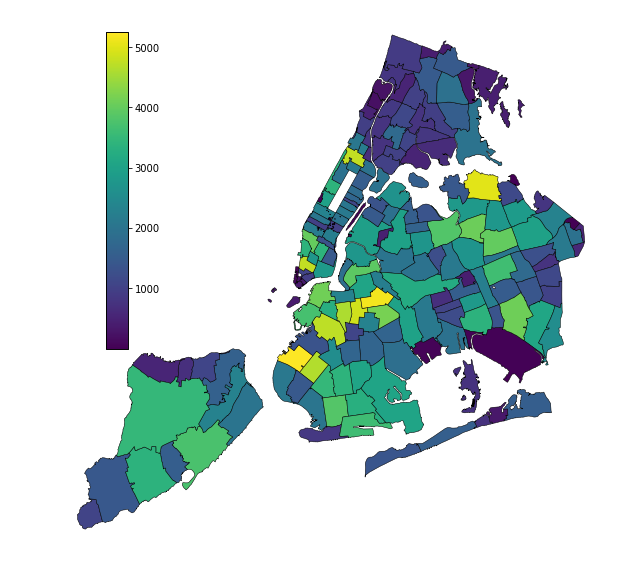

In [147]:
cp.choroplethNYC(mr_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [148]:
nb_["new_buildings_density"] = nb_["BOROUGH"] / nb_["AREA"]
mr_["major_renovation_density"] = mr_["BOROUGH"] / mr_["AREA"]

(array([ 193.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.96344877e-07,   3.78962762e-04,   7.57729180e-04,
          1.13649560e-03,   1.51526202e-03,   1.89402843e-03,
          2.27279485e-03,   2.65156127e-03,   3.03032769e-03,
          3.40909410e-03,   3.78786052e-03]),
 <a list of 10 Patch objects>)

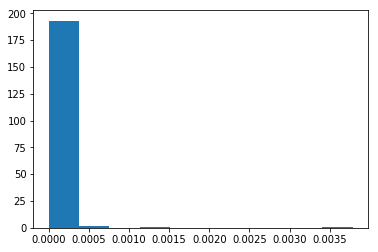

In [151]:
pl.hist(nb_.new_buildings_density)

In [154]:
nb1_ = nb_[nb_["new_buildings_density"]<0.0005]

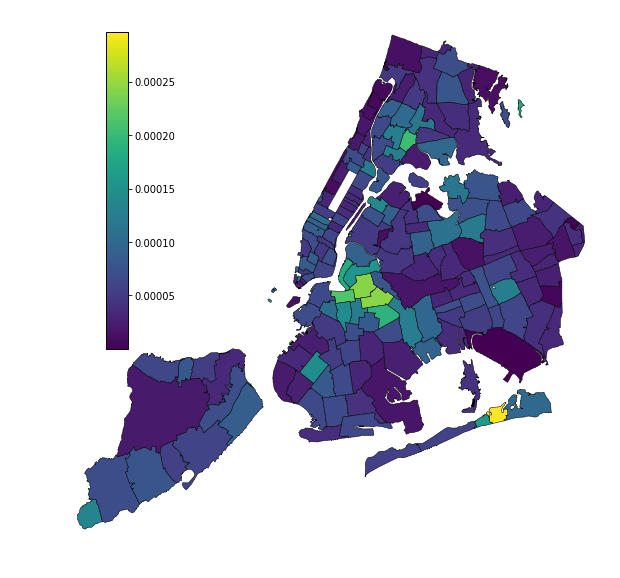

In [155]:
cp.choroplethNYC(nb1_, column="new_buildings_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([ 222.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.40060461e-07,   5.26352334e-04,   1.05256461e-03,
          1.57877688e-03,   2.10498915e-03,   2.63120143e-03,
          3.15741370e-03,   3.68362597e-03,   4.20983825e-03,
          4.73605052e-03,   5.26226279e-03]),
 <a list of 10 Patch objects>)

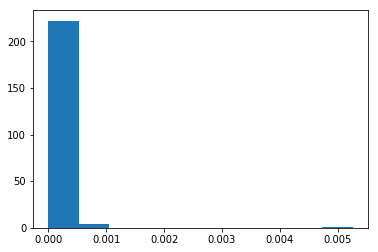

In [156]:
pl.hist(mr_.major_renovation_density)

In [157]:
mr1_ = mr_[mr_["major_renovation_density"]<0.001]

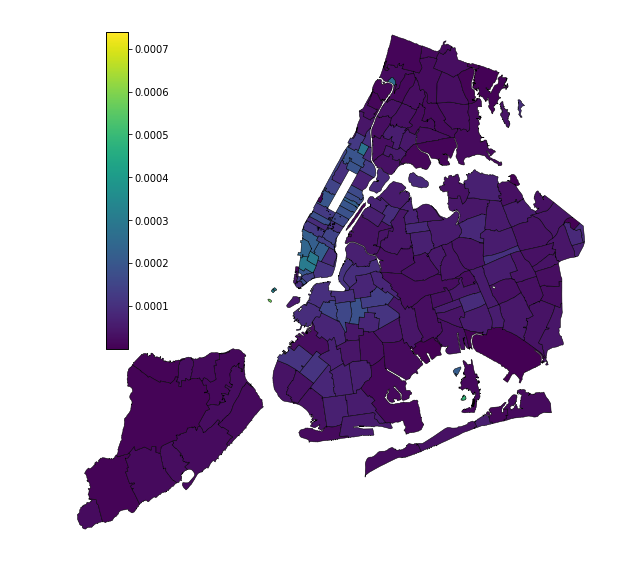

In [159]:
cp.choroplethNYC(mr1_, column="major_renovation_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [160]:
big_buildings_byct = big_bldg.groupby(big_bldg["Zip Code"]).count()
small_buildings_byct = small_bldg.groupby(small_bldg["Zip Code"]).count()

In [161]:
big_buildings_byct["Zip"] = big_buildings_byct.index.astype(int)
big_buildings_byct["Zips"] = big_buildings_byct["Zip"].astype(str)
bb = pd.merge(big_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
bb_ = gp.GeoDataFrame(bb)

small_buildings_byct["Zip"] = small_buildings_byct.index.astype(int)
small_buildings_byct["Zips"] = small_buildings_byct["Zip"].astype(str)
sb = pd.merge(small_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
sb_ = gp.GeoDataFrame(sb)

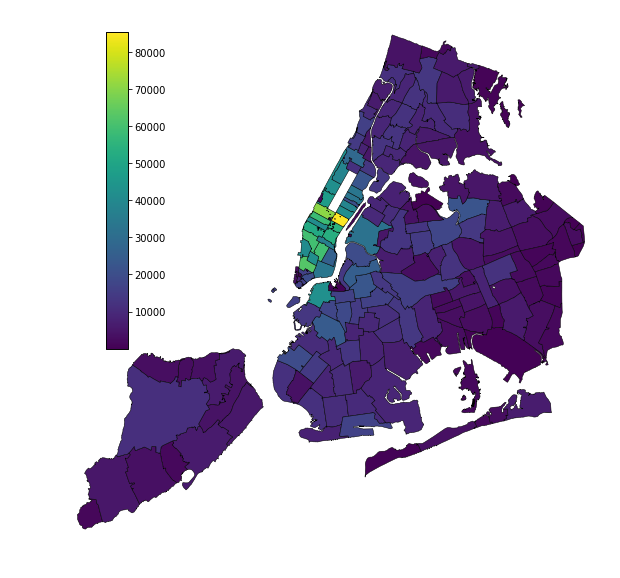

In [162]:
cp.choroplethNYC(bb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

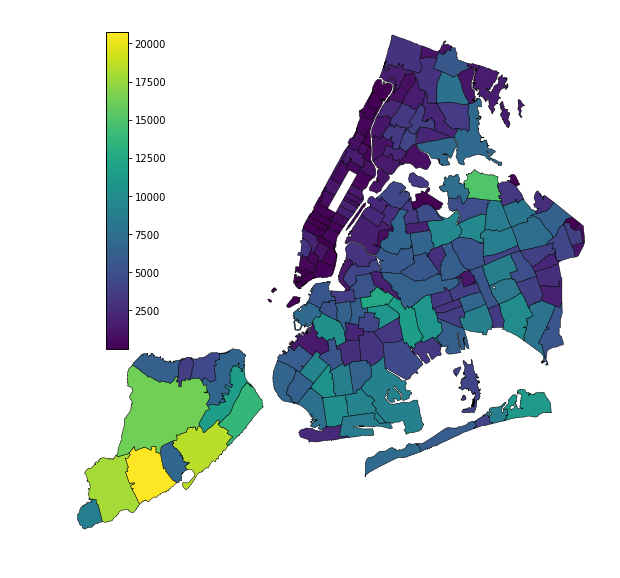

In [163]:
cp.choroplethNYC(sb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);